# <font color='blue'>SME0241 - Introdução à Modelagem Matemática</font>

ICMC-USP
----

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Questão 1:  (2,5 pontos)
Considerando a equação do calor abaixo:

$$
u_t(x,t)=\kappa u_{xx}(x,t)
$$

onde $\kappa=2$. Suponha que o intervalo temporal esteja discretizado de modo que $\Delta t = 0.14$. Qual dos valores abaixo para $\Delta x$ torna o método de diferenças finitas estável?
Implemente um código para encontrar o valor pedido.

a) 0.6</font><br>
b) 0.75 (X)<br>
c) 0.70<br>
d) 0.5<br>

In [2]:
k = 2
dt = 0.14
dx = np.sqrt(2*k*dt)
print("Δx =",format(dx, ".2f"))

# Veja a resolução do código acima a seguir:
# k*(Δt/Δx^2) <= 0.5
# 2*(0.14/Δx^2) <= 0.5
# Δx^2 >= 14/25
# Δx >= sqrt(14)/5 para Δx >= 0
# Δx =~ 0.75

print("Veja que pelo teorema de lax, a razão é de fato menor que 1/2 :")

def lax(estavel):
    _k = 2
    _dt = 0.14
    _dx = 0.75
    estavel = (_k)*(_dt/_dx**2) 
    return estavel 
print("resultado aproximado da razão =", lax(""))

Δx = 0.75
Veja que pelo teorema de lax, a razão é de fato menor que 1/2 :
resultado aproximado da razão = 0.4977777777777778


## Questão 2:  (2,5 pontos)
Considere a função 

$$
f(x)=tan(x)
$$

no intervalo $x\in[0.2,0.6]$.

Aproxime a função no ponto x = 0.4 utilizando o polinômio de Taylor de segundo grau abaixo

$$
f(x_0+h) = f(x_0)+f^{'}(x_0)h + f^{''}(x_0)\frac{h^2}{2}
$$

Qual o valor da aproximação no ponto $x = 0.5$ (considere três casas decimais)?

Imprima, em um só quadro, o gráfico da função $f(x) = tan(x)$ e do polinômio de Taylor obtido. Além disso, mostre graficamente o ponto $x = 0.5$ avaliado no polinômio de Taylor.


a) 0.437<br>
b) 0.643<br>
c) 0.545 (X)<br>
d) 0.449<br>

O valor da aproximação no ponto x = 0.5 em três casas resulta: 0.546 



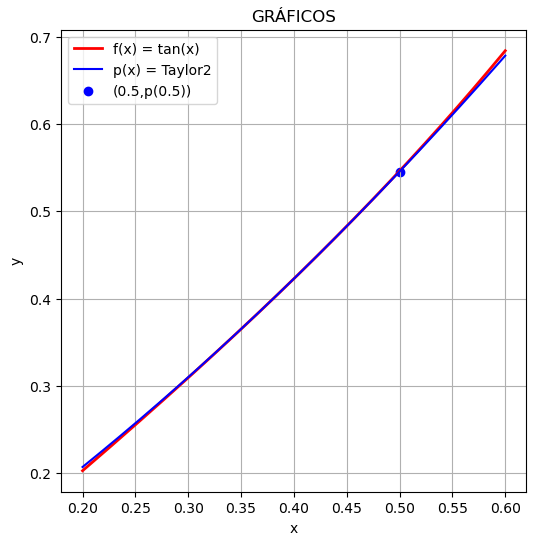

In [15]:
# Achar as derivadas da função f(x) = tan(x) para definir o polinômio de taylor de segundo grau na função def abaixo:
# Seja x = x0 + h, então h = x - x0 = x - 0.4

def Taylor2(_x):
    h = _x - 0.4
    polinomio = np.tan(0.4) + h/(np.cos(0.4)**2) + (h**2)*(np.sin(0.4)/np.cos(0.4)**3)
    return polinomio
print("O valor da aproximação no ponto x = 0.5 em três casas resulta:", format(Taylor2(0.5), ".3f"),"\n")

# f(x) = tan(x)
x = np.linspace(0.2, 0.6, 1000)
f_x = np.tan(x)

# p(x) = Taylor2
h = x - 0.4
p_x = np.tan(0.4) + h /(np.cos(0.4)**2) + (h**2)*(np.sin(0.4)/np.cos(0.4)**3)

# plotando a figura
plt.figure(figsize=(6, 6))
plt.plot(x, f_x, label='f(x) = tan(x)', color='red', linewidth = 2)
plt.plot(x, p_x, label='p(x) = Taylor2', color='blue', linewidth = 1.5)
plt.scatter(0.5, Taylor2(0.5), c='blue', label = "(0.5,p(0.5))")
plt.xlabel('x')
plt.ylabel('y')
plt.title('GRÁFICOS')
plt.grid(True)
plt.legend()
plt.show()

## Questão 3:  (2,5 pontos)
Considere a equação do calor como descrita abaixo:

$$
u_t(x,t)=\kappa u_{xx}(x,t)
$$

Supondo $x\in[0,2\pi]$, $t\in[0,3]$, $\kappa=3$, $\Delta x = 0.7$ e as condições de contorno $u(0,t)=t^3$ e $u(2\pi,t)=sen(t)$ encontre uma aproximação do valor da solução em $u(2,3)$. O valor aproximado é:

a) 8.326<br>
b) 7.975 (X)<br>
c) 6.447<br>
d) 5.450<br>

Faça um gráfico da solução aproximada em $u(x,3)$ e o ponto $u(2,3)$ apontado na solução.

Dica: calcule a solução aproximada em $u(x,3)$ por interpolação linear

O valor aproximado de u(2,3): 7.978180808794452 



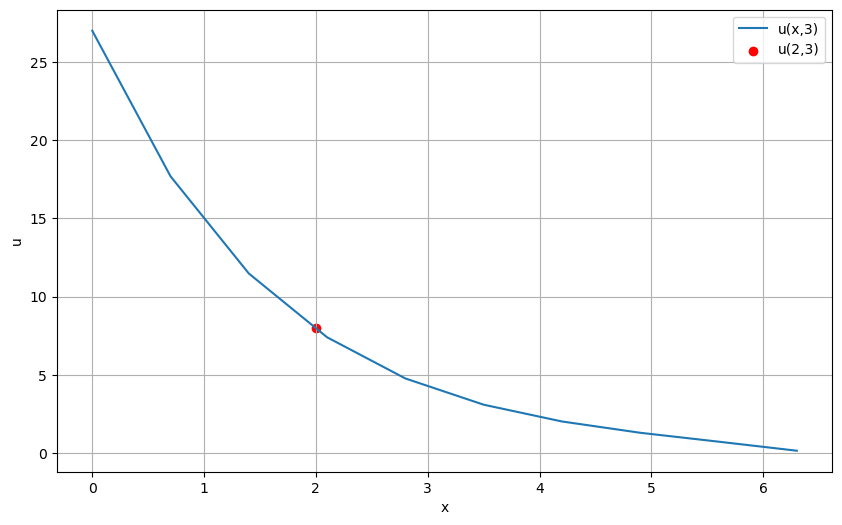

In [39]:
# definindo os parâmetros
L = 2 * np.pi
T = 3
kappa = 3
dx = 0.7
dt = 0.01

# discretizando espaço  e tempo
x = np.arange(0, L + dx, dx)
t = np.arange(0, T + dt, dt)

# montando a matriz
u = np.zeros((len(x), len(t)))

# condição inicial
u[:, 0] = 0

# condições de contorno aplicadas à primeira e ultima linha da matriz
u[0, :] = t**3
u[-1, :] = np.sin(t)

# simplificando notações apenas
alpha = kappa * dt / (dx**2)

# fórmula da equação do calor aproximada por diferenças finitas
for j in range(0, len(t) - 1):
    u[1:-1, j + 1] = u[1:-1, j] + alpha * (u[2:, j] - 2 * u[1:-1, j] + u[:-2, j])

# achando os índices da matrix u de acordo com os valores do enunciado (2,3)
x_dado = 2
t_dado = 3
i_dado = int(x_dado / dx)
j_dado = int(t_dado / dt)

# fazendo interpolação
x0 = x[i_dado]
x1 = x[i_dado + 1]
u0 = u[i_dado, j_dado]
u1 = u[i_dado + 1, j_dado]
u_dado = u0 + (u1 - u0) * (x_dado - x0) / (x1 - x0)

print("O valor aproximado de u(2,3):", u_dado, "\n")

# Plotando u(x,3) e o ponto u(2,3)
plt.figure(figsize=(10, 6))
plt.plot(x, u[:, j_dado], label=f"u(x,{t_dado})")
plt.scatter(x_dado, u_dado, color='red', label=f"u({x_dado},{t_dado})")
plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.grid(True)
plt.show()

## Questão 4:  (2,5 pontos)
Considere a função $f(x)=xe^x$.
Faça o gráfico da função $f^{\prime}(x)$ (primeira derivada) e da aproximação de $\hat{f}^{\prime}(x)$ utilizando diferenças finitas centradas no intervalo $[-3,3]$ com $\Delta x=0.1$. Repita o processo para $f^{\prime\prime}(x)$ e $\hat{f}^{\prime\prime}(x)$. O valor dos erros de aproximação (com três casas decimais) $|f^{\prime}(x)-\hat{f}^{\prime}(x)|$ e $|f^{\prime\prime}(x)-\hat{f}^{\prime\prime}(x)|$ no ponto $x=1.5$ são, respectivamente:

a) 0.723 e 0.023<br>
b) 0.756 e 0.022<br>
c) 0.818 e 0.020 (X)<br>
d) 0.812 e 0.023

O valor do erro 1 = 0.819
O valor do erro 2 = 0.021 



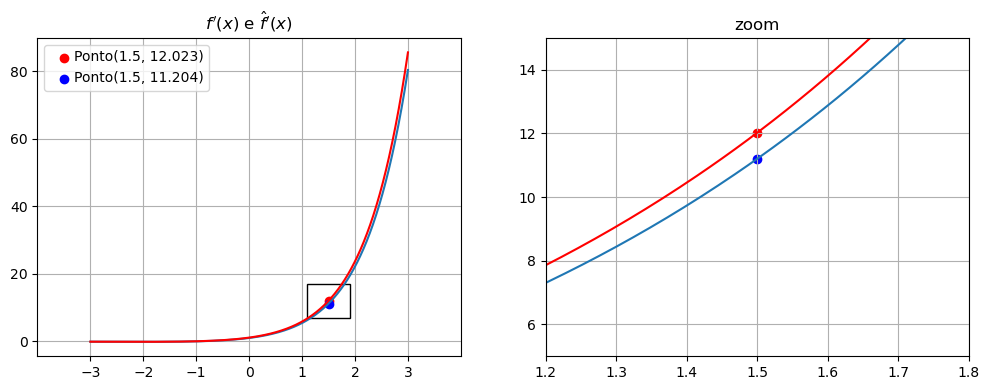

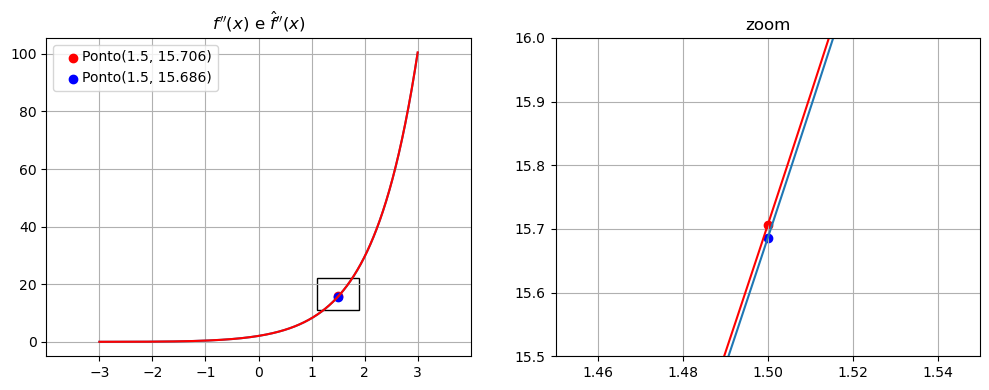

In [5]:
# definindo as funções f(x), f'(x) e f''(x)

def funcao(x):
    f = x*(np.exp(x))
    return f

def derivada1(x):
    f1 = (1+x)*(np.exp(x))
    return f1

def derivada2(x):
    f2 = (2+x)*(np.exp(x))
    return f2
    
# valores dos erros usando as fórmulas:
# f^'(x) ~ (f(x+h)-f(x))/Δx
# f^''(x) ~ (f(x+h)-2*f(x)+f(x-h))/Δx**2

e1 = abs(derivada1(1.5)-(funcao(1.6)-funcao(1.5))/0.1)
print("O valor do erro 1 =", format(e1, ".3f"))

e2 = abs(derivada2(1.5) - ((funcao(1.6) - 2*funcao(1.5) + funcao(1.4))/0.1**2))
print("O valor do erro 2 =", format(e2, ".3f"), "\n")


import matplotlib.patches as patches

# Gráfico para f'(x) e o ponto de f^'(x)

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

x = np.linspace(-3, 3, 1000)
y = (1+x)*(np.exp(x))

f_dif1 = (funcao(1.6)-funcao(1.5))/0.1

ax1.scatter(1.5, f_dif1, color = 'red', label = f'Ponto({1.5}, {format(f_dif1,".3f")})')
ax1.scatter(1.5, derivada1(1.5), color = 'blue', label = f'Ponto({1.5}, {format(derivada1(1.5),".3f")})')

ax2.scatter(1.5, f_dif1, color = 'red')
ax2.scatter(1.5, derivada1(1.5), color = 'blue')

rect = patches.Rectangle((1.1,7),0.8,10,linewidth=1,edgecolor='k',facecolor='none')
ax1.add_patch(rect)

ax1.grid(True)
ax2.grid(True)
x_ticks = np.arange(-3,4,1)
ax1.set_xlim(-4,4)
ax1.set_xticks(x_ticks)
ax2.set_xlim(1.2,1.8)
ax2.set_ylim(5,15)
ax1.plot(x,y)
ax1.plot(x,10*(funcao(x+0.1)-funcao(x)), color = "red")
ax2.plot(x,y)
ax2.plot(x,10*(funcao(x+0.1)-funcao(x)), color = "red")
ax1.set_title('$f^{\prime}(x)$ e $\hat{f}^{\prime}(x)$')
ax2.set_title('zoom')
ax1.legend(handletextpad = -0.3)
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

# Gráfico para f''(x) e o ponto de f^''(x)

fig2, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

x = np.linspace(-3, 3, 1000)
y = (2+x)*(np.exp(x))

f_dif2 = (funcao(1.6) - 2*funcao(1.5) + funcao(1.4))/0.1**2

ax1.scatter(1.5, f_dif2, color = 'red', label = f'Ponto({1.5}, {format(f_dif2,".3f")})')
ax1.scatter(1.5, derivada2(1.5), color = 'blue', label = f'Ponto({1.5}, {format(derivada2(1.5),".3f")})')

ax2.scatter(1.5, f_dif2, color = 'red')
ax2.scatter(1.5, derivada2(1.5), color = 'blue')

rect = patches.Rectangle((1.1,11),0.8,11,linewidth=1,edgecolor='k',facecolor='none')
ax1.add_patch(rect)

ax1.grid(True)
ax2.grid(True)
x_ticks = np.arange(-3,4,1)
ax1.set_xlim(-4,4)
ax1.set_xticks(x_ticks)
ax2.set_xlim(1.45,1.55)
ax2.set_ylim(15.5,16)
ax1.plot(x,y)
ax1.plot(x,100*(funcao(x+0.1)-2*funcao(x)+funcao(x-0.1)), color = "red")
ax2.plot(x,y)
ax2.plot(x,100*(funcao(x+0.1)-2*funcao(x)+funcao(x-0.1)), color = "red")
ax1.set_title('$f^{\prime\prime}(x)$ e $\hat{f}^{\prime\prime}(x)$')
ax2.set_title('zoom')
ax1.legend(handletextpad = -0.3)
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()